In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#数据需要是numpy的数据类型
jobs=pd.read_excel('./data/job1.xlsx')
jobs.head()

,名称,描述,类别,薪资
0,asp.net实习生,"岗位要求： 1.全日制本科以上学历,计算机及相关专业优先； 2.熟悉.NET项目开发，...",软件,100-150
1,web前端,"任职资格:1. 计算机相关专业，本科或以上学历；2.熟练掌握原生js,了解一些es6的新特性...",前端,150-200
2,网站运营实习生,职位描述： 1、营销活动：负责营销活动支持、页面搭建、物料整理、资源位投放及数据整理； 2、...,内容运营,100-150
3,前端开发实习生,\t岗位描述：\t1、依据产品需求高质量地完成复杂SPA应用以及全栈应用的开发、维护； \t...,前端,200-250
4,美工实习生,岗位职责： 1、负责公司市场宣传品如彩页、海报、手册等的设计工作； 2、负责网站图片、焦点图...,平面设计,100-150


In [2]:
jobs.columns=['name','description','category','salary']

1. 总体分析：
1.1 岗位在城市间的分布
1.2 岗位在行业间的分布
1.3 岗位在公司间的分布（融资轮次、规模、类别）
1.4 需求岗位在月份间的分布
1.5 岗位需求数量的分布

2. 对薪资的分析：
2.1 薪资的城市分布
2.2 薪资的行业分布
2.3 薪资的企业分布（企业融资轮次、企业规模、企业类别）
2.4 薪资的岗位分布

2.1 薪资的行业分布：
2.1.1 薪酬分布直方图
2.1.2 最高薪酬
2.1.3 最低薪酬
2.1.4 频率最大
2.1.5 频率最低

对薪资进行预处理，最低的薪资作为一列，最高的薪资作为一列，小于50的置为0.

In [29]:
jobs['salary_max']=jobs['salary']
jobs['salary_min']=jobs['salary']
for i in range(len(jobs['salary'])):
    try: 
        if  jobs['salary'][i].split('-')[1]>40 and jobs['salary'][i].split('-')[1]<'700':
            jobs['salary_max'][i]=int(jobs['salary'][i].split('-')[1])
            jobs['salary_min'][i]=int(jobs['salary'][i].split('-')[0])
        else :
            jobs['salary_max'][i]=0
            jobs['salary_min'][i]=0
    except:
        if  jobs['salary'][i]>40 and jobs['salary'][i]<'700':
            jobs['salary_max'][i]=int(jobs['salary'][i])
            jobs['salary_min'][i]=int(jobs['salary'][i])
        else:
            jobs['salary_max'][i]=0
            jobs['salary_min'][i]=0
jobs.head()

,name,description,category,salary,salary_max,salary_min
0,asp.net实习生,"岗位要求： 1.全日制本科以上学历,计算机及相关专业优先； 2.熟悉.NET项目开发，...",软件,100-150,150,100
1,web前端,"任职资格:1. 计算机相关专业，本科或以上学历；2.熟练掌握原生js,了解一些es6的新特性...",前端,150-200,200,150
2,网站运营实习生,职位描述： 1、营销活动：负责营销活动支持、页面搭建、物料整理、资源位投放及数据整理； 2、...,内容运营,100-150,150,100
3,前端开发实习生,\t岗位描述：\t1、依据产品需求高质量地完成复杂SPA应用以及全栈应用的开发、维护； \t...,前端,200-250,250,200
4,美工实习生,岗位职责： 1、负责公司市场宣传品如彩页、海报、手册等的设计工作； 2、负责网站图片、焦点图...,平面设计,100-150,150,100


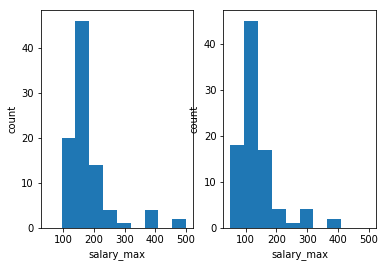

In [135]:
tmax=np.array(jobs['salary_max'])
tempmax=np.zeros(shape=(100,1))
for i in range(tmax.shape[0]):
    tempmax[i]=tmax[i]
    
tmin=np.array(jobs['salary_min'])
tempmin=np.zeros(shape=(100,1))
for i in range(tmin.shape[0]):
    tempmin[i]=tmin[i]
    
plt.subplot(1,2,1)
plt.hist(x=tempmax,bins=10,range=(50,500))
plt.xlabel('salary_max')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.hist(x=tempmin,bins=10,range=(50,500))
plt.xlabel('salary_max')
plt.ylabel('count')
plt.show()

<class 'pandas.core.series.Series'>


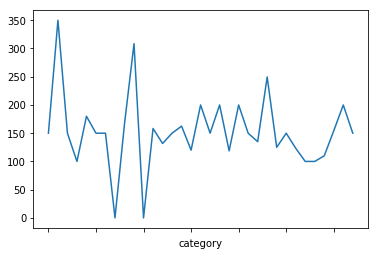

In [167]:
#不用pd.to_numeric函数会报错：DataError: No numeric types to aggregate
jobs['salary_max']=jobs['salary_max'].apply(pd.to_numeric)
jobs['salary_min']=jobs['salary_min'].apply(pd.to_numeric)

jobs_cate_sa_max=jobs['salary_max'].groupby(jobs['category']).mean()
jobs_cate_sa_min=jobs['salary_min'].groupby(jobs['category']).mean()
print(type(jobs_cate_sa_max))
jobs_cate_sa_max.plot()

In [152]:
df=pd.DataFrame([[0,1],[2,1],[3,1],[4,2]],columns=['a1','a2'])
tt=df['a1'].groupby(df['a2']).mean()
print(tt)
print(df['a1'].apply(type))

a2
1    1.666667
2    4.000000
Name: a1, dtype: float64
0    <type 'int'>
1    <type 'int'>
2    <type 'int'>
3    <type 'int'>
Name: a1, dtype: object


In [20]:
job_sa=jobs['salary'].groupby(jobs['category'])
job_sa.describe()

,count,unique,top,freq
category,,,,
Android,1,1,100-150,1
C/C++,2,2,300-400,1
IT互联网,2,1,100-150,2
IT运维,1,1,50-100,1
Java,4,4,100-120,1
PHP,1,1,100-150,1
Python,2,1,100-150,2
UI/UE,1,1,0,1
iOS,3,2,100-150,2


3. 对应聘者要求的分析（不同岗位）
3.1 技术要求（词云）（不同的岗位）
3.2 学历要求
3.3 实习时间要求
3.4 软实力要求（词云）（不同的岗位）
3.5 要求和企业的关系（城市、融资轮次、企业规模）